# Plot evolution of thresholds during test

Here we compute and plot the evolution of the multipactor thresholds during the conditioning process.

## Set up

Generic libraries:

In [1]:
from functools import partial
from pathlib import Path
import tomllib

import numpy as np

MULTIPAC testbench imports:

In [2]:
from multipac_testbench.multipactor_test import MultipactorTest
import multipac_testbench.instruments as ins
from multipac_testbench.util.post_treaters import running_mean
from multipac_testbench.util.multipactor_detectors import \
    quantity_is_above_threshold

Set up project:

In [3]:
project = Path("../data/campaign_one_probe/")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

Load the files:

In [4]:
frequencies = (120., 160.)
swrs = (1., 1.)
filepath = Path(project, "120MHz_travelling.csv")
multipactor_test = MultipactorTest(
    filepath,
    freq_mhz=120.,
    swr=1.,
    config=config,
    sep='\t')

## Compute multipactor thresholds

Smooth the current:

In [5]:
current_smoother = partial(
    running_mean,
    n_mean=10,
    mode='same',
)

multipactor_test.add_post_treater(
    current_smoother,
    ins.CurrentProbe,
)

Detect multipactor:

In [6]:
current_multipactor_criterions = {'threshold': 16.,
                                  'consecutive_criterion': 10,
                                  'minimum_number_of_points': 5}
current_multipac_detector = partial(quantity_is_above_threshold,
                                    **current_multipactor_criterions)
power_growth_mask_kw = {'n_trailing_points_to_check': 70}
current_multipactor_bands = multipactor_test.detect_multipactor(
    current_multipac_detector,
    ins.CurrentProbe,
    power_growth_mask_kw=power_growth_mask_kw,
)

## Plot evolution of thresholds during conditioning

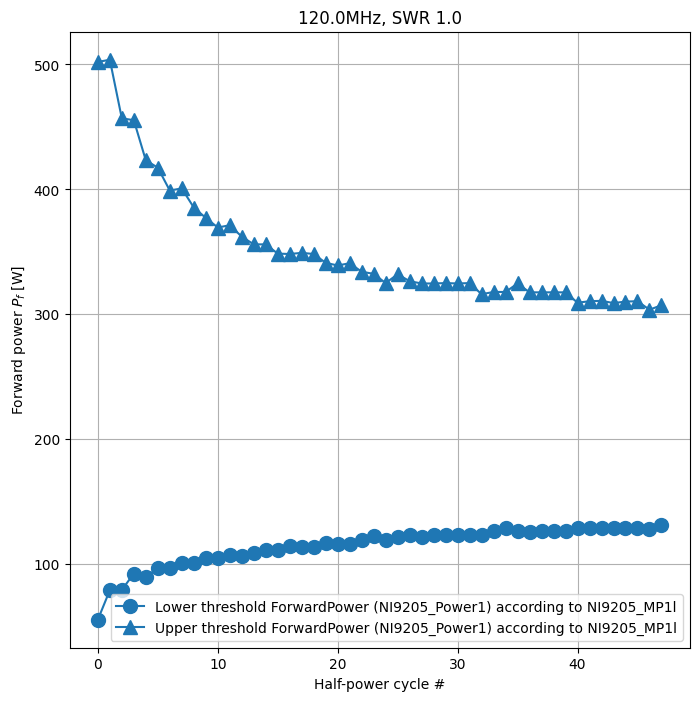

In [7]:
figsize = (8, 8)
axes, _ = multipactor_test.plot_thresholds(ins.ForwardPower,
                                           current_multipactor_bands,
                                           figsize=figsize)